In [26]:
import pandas as pd
import matplotlib.pyplot as plt


In [27]:
# Sample data
accounts = ['Sales', 'Marketing', 'Ops']
dates = pd.date_range('2025-01-31', periods=4, freq='ME')
"""
data = {
    account: [1000 * (i + 1) * (-1 if i % 2 else 1) for i in range(len(dates))]
    for account in accounts
}
"""
data = {"Sales": [100, 200, 300, 400], "Marketing": [100, -200, 300, -400], "Ops": [150, 250, -350, 450]}
final_df = pd.DataFrame(data, index=dates).T

In [28]:
final_df

,2025-01-31,2025-02-28,2025-03-31,2025-04-30
Sales,100,200,300,400
Marketing,100,-200,300,-400
Ops,150,250,-350,450


In [29]:
# Prepare plot
periods = final_df.columns
x = range(len(periods))


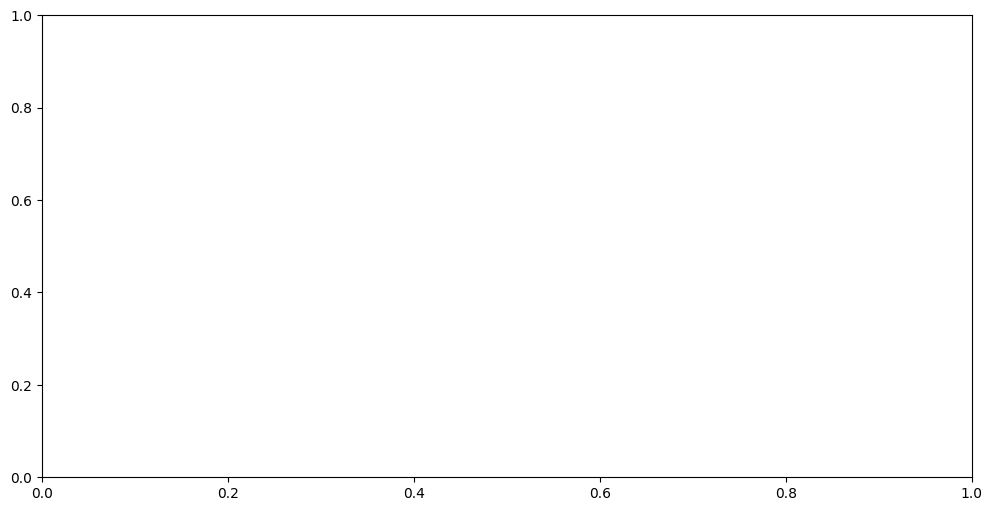

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

In [31]:
# Separate positive and negative stacking
pos_bottom = [0] * len(periods)
neg_bottom = [0] * len(periods)
colors = plt.cm.tab20.colors


In [32]:
for i, account in enumerate(final_df.index):
    values = final_df.loc[account].values
    pos_vals = [v if v > 0 else 0 for v in values]
    neg_vals = [v if v < 0 else 0 for v in values]

    ax.bar(x, pos_vals, bottom=pos_bottom, label=account if any(pos_vals) else "", color=colors[i % len(colors)])
    ax.bar(x, neg_vals, bottom=neg_bottom, label=account if any(neg_vals) else "", color=colors[i % len(colors)])

    # Update stacking baselines
    pos_bottom = [pb + v for pb, v in zip(pos_bottom, pos_vals)]
    neg_bottom = [nb + v for nb, v in zip(neg_bottom, neg_vals)]


In [33]:
# X axis
ax.set_xticks(x)
ax.set_xticklabels([p.strftime('%Y-%m-%d') for p in periods], rotation=45, ha='right')


[Text(0, 0, '2025-01-31'),
 Text(1, 0, '2025-02-28'),
 Text(2, 0, '2025-03-31'),
 Text(3, 0, '2025-04-30')]

In [34]:
# Labels and legend
ax.set_ylabel("Amount")
ax.set_title("Cash Flow by Account and Period")
ax.legend()
ax.grid(True)

In [35]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [36]:
final_df

,2025-01-31,2025-02-28,2025-03-31,2025-04-30
Sales,100,200,300,400
Marketing,100,-200,300,-400
Ops,150,250,-350,450


In [41]:
net_cashflow = final_df.sum(axis=0).values
line1, = ax.plot(x, net_cashflow, color='black', label='Net Cashflow', marker='o', linewidth=2)

cumulative_balance = net_cashflow.cumsum()
line2, = ax.plot(x, cumulative_balance, color='blue', label='Balance', linestyle='--', marker='x', linewidth=2)


In [42]:
net_cashflow

array([350, 250, 250, 450])

In [40]:
cumulative_balance

array([ 350,  600,  850, 1300])

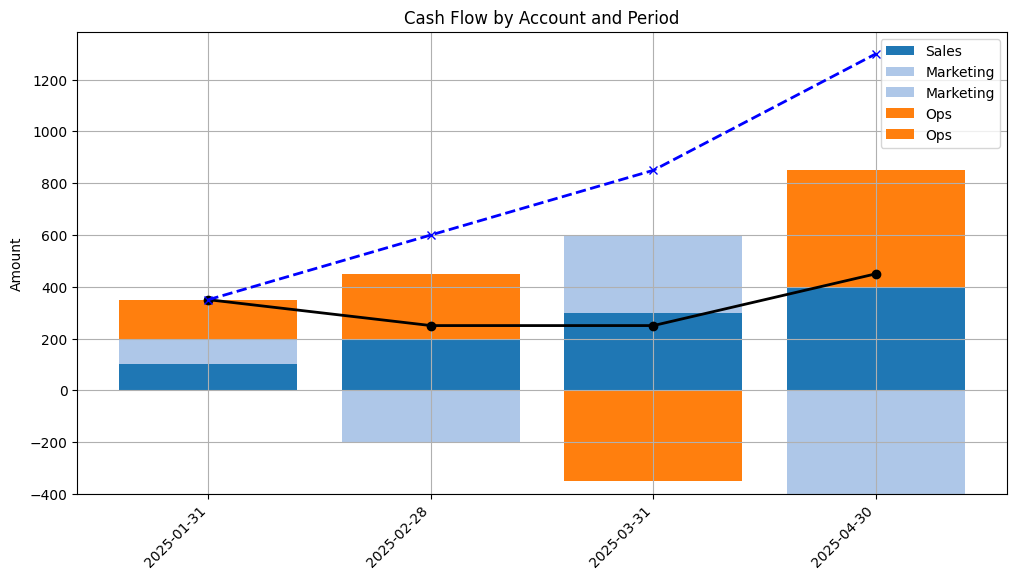

In [38]:
fig